## Business objective

To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

## Read and understand the data

In [3]:
#Read file
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
#Checking the shape of dataset
lead.shape

(9240, 37)

In [6]:
#Understanding the numerical attributes
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [7]:
#Checking percentage of missing values
round(100*lead.isnull().sum()/len(lead.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#Below columns are categorical variables, so they have category called select which need to be converted as null value.
#Converting select values to nan
lead['Specialization'] = lead['Specialization'].replace('Select', np.nan)
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace('Select', np.nan)
lead['Lead Profile'] = lead['Lead Profile'].replace('Select', np.nan)
lead['City'] = lead['City'].replace('Select', np.nan)

In [9]:
#Checking percentage of null values in each column
round(100*lead.isnull().sum()/len(lead.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#Dropping the columns which have null value more than 30%
lead = lead.drop(['Specialization','How did you hear about X Education', 'Tags', 'Lead Quality','Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1)

In [11]:
#Dropping columns country & What matters most to you in choosing a course as they are of no use in our modelling.
lead = lead.drop(['Country','What matters most to you in choosing a course'],axis = 1)

In [12]:
#Again checking the percentage of null values
round(100*lead.isnull().sum()/len(lead.index),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00


### Treating missing values

In [13]:
#Checking value counts for column Lead Source
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
blog                    1
welearnblog_Home        1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [14]:
#Imputing null values with 'Google' & replacing 'google' with 'Google'
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Google')

In [15]:
#Checking for mean,median, standard deviation of column 'Total Visits'
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

Median is 3 for column Total Visits

In [16]:
#Imputing Null values of Total Visits with its median 
lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan,3)

In [17]:
#Checking the median of column page view per visits
lead['Page Views Per Visit'].median()

2.0

In [18]:
#Imputing null nalues of page views per visits with its median
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].replace(np.nan,2)

In [19]:
#Checking the value counts for the column Last Activity
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [20]:
#Imputing the null values of column Last Activity with 'Email Opened'
lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Email Opened')

In [21]:
#Checking value counts for column 'What matters most to you in choosing a course'
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
#Since maximum of the people are unemployed, so we will impute null values with 'unemployed'
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Unemployed')

In [23]:
#Checking null values
round(100*lead.isnull().sum()/len(lead.index))

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

Now all the columns have no null values.

In [24]:
#Checking the value counts of 'Magazines','Receive More Updates About Our Courses','Update me on Supply Chain Content',
#'Get updates on DM Content','I agree to pay the amount through cheque'
print(lead['Magazine'].value_counts())
print(lead['Receive More Updates About Our Courses'].value_counts())
print(lead['Update me on Supply Chain Content'].value_counts())
print(lead['Get updates on DM Content'].value_counts())
print(lead['I agree to pay the amount through cheque'].value_counts())

No    9240
Name: Magazine, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64


In [25]:
#Since columns 'Magazines','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
#'I agree to pay the amount through cheque' have only one categorical value 'No', So we need to drop these columns
lead = lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                    'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)
lead.shape

(9240, 20)

### Data Preperation

Converting binary variables (yes/no) to (0/1)

In [26]:
#Converting binary variables 'Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview'
varlist = ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview']

lead[varlist] = lead[varlist].apply(lambda x : x.map({'yes':1,'Yes':1,'No':0}))

In [27]:
#Creating the dummies
dummy1 = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']],drop_first=True)
lead = pd.concat([lead,dummy1],axis=1)
lead.shape

(9240, 79)

In [28]:
#Dropping the original columns for which we created dummies
lead = lead.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity'],axis=1)

In [29]:
#Dropping columns Prospect ID & Lead Number as they are of no use
lead = lead.drop(['Prospect ID','Lead Number'],axis=1)
lead.shape

(9240, 72)

### Treating outlier

In [30]:
#Checking for outlier
lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25,.50,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


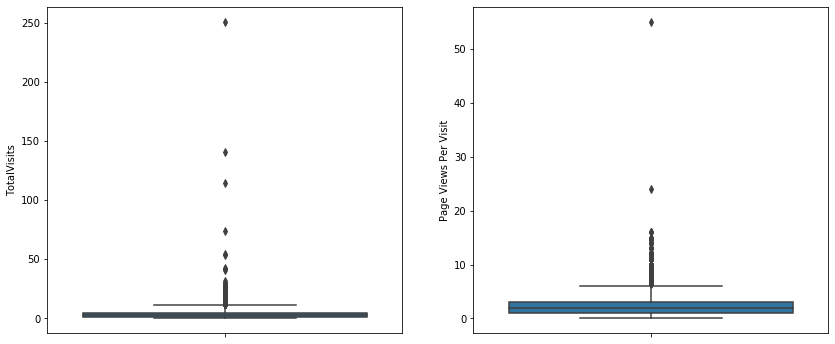

In [31]:
#Checking the outlier graphically
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y='TotalVisits',data=lead)
plt.subplot(1,2,2)
sns.boxplot(y='Page Views Per Visit',data=lead)
plt.show()

In [32]:
#Removing the outlier above 99 percentile
Q1 = lead.TotalVisits.quantile(0.99)
Q2 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead['TotalVisits']<Q1]
lead = lead[lead['Page Views Per Visit']<Q2]

In [33]:
#Checking values at different percentiles
lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25,.50,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000
mean,3.087164,483.133016,2.226383
std,2.801244,547.420675,1.823395
min,0.000000,0.000000,0.000000
25%,1.000000,7.000000,1.000000
50%,3.000000,245.000000,2.000000
75%,4.000000,929.000000,3.000000
90%,7.000000,1378.000000,5.000000
95%,8.000000,1558.000000,6.000000
99%,13.000000,1839.720000,7.000000


In [34]:
#Checking the value counts of columns Newspaper Article, X Education Forums & Newspaper
print(lead['Newspaper Article'].value_counts())
print(lead['X Education Forums'].value_counts())
print(lead['Newspaper'].value_counts())

No    9029
Name: Newspaper Article, dtype: int64
No    9029
Name: X Education Forums, dtype: int64
No     9028
Yes       1
Name: Newspaper, dtype: int64


In [35]:
#Since columns 'Newspaper Article' & 'X Education Forums' have only one value, so we will drop this columns and 'Newspaper'
#have onle one 'yes' so we drop this column too
lead = lead.drop(['Newspaper Article','X Education Forums','Newspaper'],axis=1)

In [36]:
#Check the datasets
lead.shape

(9029, 69)

### Data Visualization

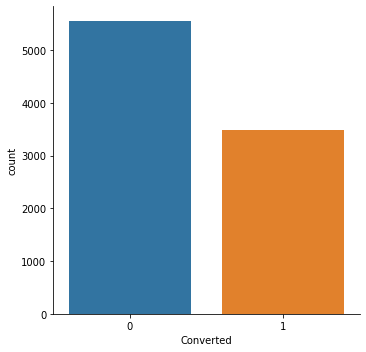

In [37]:
#Conversion rate
sns.catplot(x='Converted',kind='count',data=lead)
plt.show()

Here we can see that very less percentage people are getting converted.

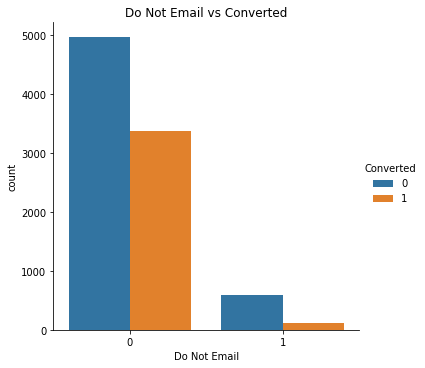

In [38]:
#Plotting between Do not email vs converted
sns.catplot(x='Do Not Email',hue='Converted',kind='count',data=lead)
plt.title('Do Not Email vs Converted')
plt.show()

Maximum persons who are getting converted are opting to send mail to them.

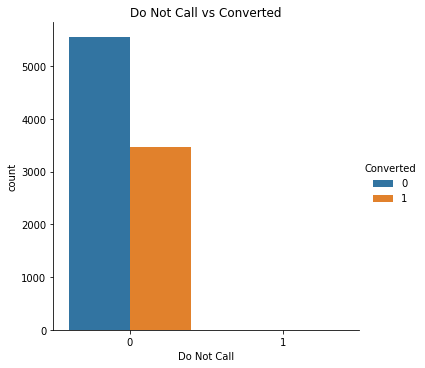

In [39]:
#Plotting between Do not call vs converted
sns.catplot(x='Do Not Call',hue='Converted',kind='count',data=lead)
plt.title('Do Not Call vs Converted')
plt.show()

From above plot we can say that more than 95% of people are opting to get a call & more than 50% of it are getting converted. 

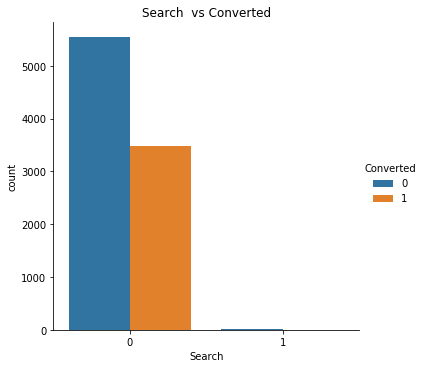

In [40]:
#Plotting between Search vs converted
sns.catplot(x='Search',hue='Converted',kind='count',data=lead)
plt.title('Search  vs Converted')
plt.show()

Conversion rate is high on leads who are not through search.

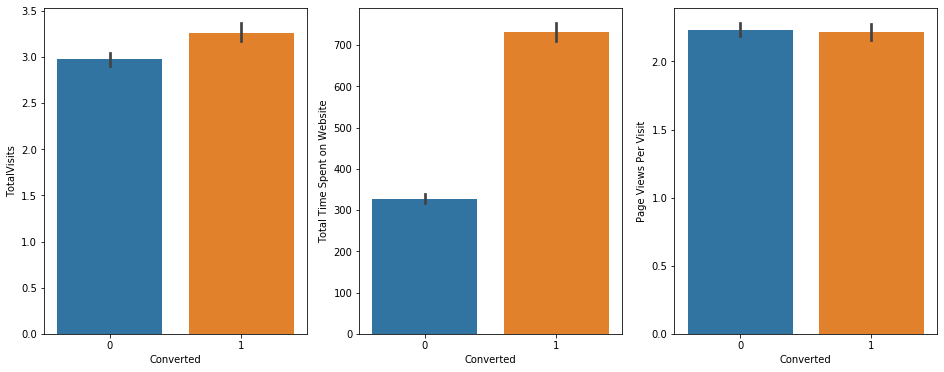

In [41]:
# Now check the conversions for all numeric values
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = lead)
plt.subplot(1,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = lead)
plt.subplot(1,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = lead)
plt.show()

From above plot we can say that the conversion rate were high for Total Visits, Total Time Spent on Website and it is little low in Page Views Per Visit.

### Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
X = lead.drop(['Converted'],axis=1)
y = lead['Converted']

In [43]:
#Splitting the data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3,random_state = 50)

### Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3894,0,0,0.1250,0.019806,0.250,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1925,0,0,0.3125,0.381162,0.625,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6175,0,0,0.2500,0.828345,0.500,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9094,1,0,0.1250,0.334067,0.125,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
450,0,0,0.1875,0.081426,0.375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Model Buliding

#### Model 1

In [45]:
import statsmodels.api as sm 
logr1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.1
Date:                Tue, 14 Jul 2020   Deviance:                       5144.2
Time:                        15:44:20   Pearson chi2:                 6.75e+03
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.2249   3.68e+05   5.77e-05      1.000   -7.21e+05    7.21e+05
Do Not Email                                            -1.1395      0.212     -5.370      0.000      -1.555      -0.724
Do Not Call                                             22.4283      4e+04      0.001      1.000   -7.83e+04    7.84e+04
TotalVisits                                              1.6759      0.302      5.555      0.000       1.085       2.267
Total Time Spent on Website                              4.5755      0.168     27.269      0.000       4.247       4.904
Page Views Per Visit                                    -0.9834      0.263     -3.738      0.000      -1.499      -0.468
Search                                                  -1.3485      1.169     -1.154      0.249      -3.640       0.943
Digital Advertisement                                   27.7083   7.27e+05   3.81e-05      1.000   -1.42e+06    1.42e+06
Through Recommendations                                  1.4794      2.087      0.709      0.478      -2.611       5.570
A free copy of Mastering The Interview                  -0.0150      0.110     -0.136      0.891      -0.231       0.201
Lead Origin_Landing Page Submission                     -0.1100      0.110     -0.996      0.319      -0.327       0.107
Lead Origin_Lead Add Form                                3.0688      0.536      5.723      0.000       2.018       4.120
Lead Origin_Lead Import                                -26.9086   1.21e+06  -2.22e-05      1.000   -2.37e+06    2.37e+06
Lead Origin_Quick Add Form                              23.3833   7.51e+04      0.000      1.000   -1.47e+05    1.47e+05
Lead Source_Direct Traffic                               2.3035      2.125      1.084      0.278      -1.861       6.468
Lead Source_Facebook                                    29.8231   1.21e+06   2.46e-05      1.000   -2.37e+06    2.37e+06
Lead Source_Google                                       2.5645      2.121      1.209      0.227      -1.592       6.721
Lead Source_Live Chat                                   26.5736   3.37e+05   7.88e-05      1.000   -6.61e+05    6.61e+05
Lead Source_NC_EDM                                      25.4257   6.11e+04      0.000      1.000    -1.2e+05     1.2e+05
Lead Source_Olark Chat                                   3.5128      2.128      1.651      0.099      -0.658       7.684
Lead Source_Organic Search                               2.4469      2.124      1.152      0.249      -1.716       6.610
Lead Source_Pay per Click Ads                          -28.8473   1.23e+07  -2.34e-06      1.000   -2.41e+07    2.41e+07
Lead Source_Press_Release                             8.24

### Feature selection using RFE

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 10),
 ('Digital Advertisement', False, 18),
 ('Through Recommendations', False, 25),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', False, 37),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 42),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', True, 1),
 ('Lead Sour

In [49]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

#### Model 2

In [50]:
X_train_sm = sm.add_constant(X_train[col])
logr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logr2 = logr2.fit()
logr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.8
Date:                Tue, 14 Jul 2020   Deviance:                       5207.6
Time:                        15:44:28   Pearson chi2:                 6.63e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8167      0.119     -6.886      0.000      -1.049      -0.584
Do Not Email                                            -1.3006      0.190     -6.837      0.000      -1.673      -0.928
TotalVisits                                              1.5913      0.292      5.453      0.000       1.019       2.163
Total Time Spent on Website                              4.6214      0.166     27.824      0.000       4.296       4.947
Page Views Per Visit                                    -1.0191      0.250     -4.080      0.000      -1.509      -0.530
Lead Origin_Lead Add Form                                3.1384      0.497      6.319      0.000       2.165       4.112
Lead Source_Olark Chat                                   1.1473      0.130      8.837      0.000       0.893       1.402
Lead Source_Reference                                    0.7818      0.531      1.472      0.141      -0.259       1.823
Lead Source_Social Media                                25.4567   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             3.3542      1.122      2.988      0.003       1.154       5.554
Last Activity_Converted to Lead                         -0.8084      0.218     -3.702      0.000      -1.236      -0.380
Last Activity_Email Bounced                             -0.9599      0.336     -2.858      0.004      -1.618      -0.302
Last Activity_Olark Chat Conversation                   -1.2028      0.185     -6.499      0.000      -1.566      -0.840
What is your current occupation_Housewife               23.3049   2.87e+04      0.001      0.999   -5.63e+04    5.63e+04
What is your current occupation_Working Professional     2.7705      0.194     14.268      0.000       2.390       3.151
Last Notable Activity_Email Link Clicked                -2.0676      0.280     -7.393      0.000      -2.616      -1.520
Last Notable Activity_Email Opened                      -1.4766      0.089    -16.541      0.000      -1.652      -1.302
Last Notable Activity_Had a Phone Conversation          22.6572   1.91e+04      0.001      0.999   -3.73e+04    3.74e+04
Last Notable Activity_Modified                          -1.7313      0.101    -17.157      0.000      -1.929      -1.534
Last Notable Activity_Olark Chat Conversation           -1.7590      0.365     -4.823      0.000      -2.474      -1.044
Last Notable Activity_Page Visited on Website           -2.0899      0.223     -9.357      0.000      -2.528      -1.652
========================================================================================================================
"""

Removing column 'Lead Source_Social Media' as it has very high p-value & it is insigficant.

In [51]:
col = col.drop('Lead Source_Social Media',1)

#### Model 3

In [52]:
X_train_sm = sm.add_constant(X_train[col])
logr3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logr3 = logr3.fit()
logr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.8
Date:                Tue, 14 Jul 2020   Deviance:                       5211.7
Time:                        15:44:29   Pearson chi2:                 6.63e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8140      0.119     -6.865      0.000      -1.046      -0.582
Do Not Email                                            -1.3011      0.190     -6.841      0.000      -1.674      -0.928
TotalVisits                                              1.5844      0.292      5.430      0.000       1.013       2.156
Total Time Spent on Website                              4.6233      0.166     27.838      0.000       4.298       4.949
Page Views Per Visit                                    -1.0204      0.250     -4.085      0.000      -1.510      -0.531
Lead Origin_Lead Add Form                                3.1365      0.497      6.315      0.000       2.163       4.110
Lead Source_Olark Chat                                   1.1407      0.130      8.792      0.000       0.886       1.395
Lead Source_Reference                                    0.7810      0.531      1.470      0.141      -0.260       1.822
Lead Source_Welingak Website                             3.3534      1.122      2.988      0.003       1.153       5.553
Last Activity_Converted to Lead                         -0.8101      0.218     -3.710      0.000      -1.238      -0.382
Last Activity_Email Bounced                             -0.9599      0.336     -2.858      0.004      -1.618      -0.302
Last Activity_Olark Chat Conversation                   -1.1779      0.184     -6.410      0.000      -1.538      -0.818
What is your current occupation_Housewife               23.3035   2.87e+04      0.001      0.999   -5.63e+04    5.63e+04
What is your current occupation_Working Professional     2.7690      0.194     14.263      0.000       2.388       3.149
Last Notable Activity_Email Link Clicked                -2.0664      0.280     -7.388      0.000      -2.615      -1.518
Last Notable Activity_Email Opened                      -1.4766      0.089    -16.539      0.000      -1.652      -1.302
Last Notable Activity_Had a Phone Conversation          22.6576   1.91e+04      0.001      0.999   -3.73e+04    3.74e+04
Last Notable Activity_Modified                          -1.7316      0.101    -17.158      0.000      -1.929      -1.534
Last Notable Activity_Olark Chat Conversation           -1.7817      0.364     -4.894      0.000      -2.495      -1.068
Last Notable Activity_Page Visited on Website           -2.0895      0.223     -9.355      0.000      -2.527      -1.652
========================================================================================================================
"""

Removing column 'What is your current occupation_Housewife' as it has high p-value & it is insigficant.

In [53]:
col = col.drop('What is your current occupation_Housewife',1)

#### Model 4

In [54]:
X_train_sm = sm.add_constant(X_train[col])
logr4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logr4 = logr4.fit()
logr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.2
Date:                Tue, 14 Jul 2020   Deviance:                       5218.4
Time:                        15:44:30   Pearson chi2:                 6.64e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8127      0.119     -6.856      0.000      -1.045      -0.580
Do Not Email                                            -1.3026      0.190     -6.847      0.000      -1.675      -0.930
TotalVisits                                              1.5767      0.292      5.406      0.000       1.005       2.148
Total Time Spent on Website                              4.6300      0.166     27.889      0.000       4.305       4.955
Page Views Per Visit                                    -1.0215      0.250     -4.091      0.000      -1.511      -0.532
Lead Origin_Lead Add Form                                3.1344      0.497      6.311      0.000       2.161       4.108
Lead Source_Olark Chat                                   1.1373      0.130      8.770      0.000       0.883       1.391
Lead Source_Reference                                    0.7887      0.531      1.485      0.137      -0.252       1.830
Lead Source_Welingak Website                             3.3519      1.122      2.986      0.003       1.152       5.552
Last Activity_Converted to Lead                         -0.8159      0.218     -3.736      0.000      -1.244      -0.388
Last Activity_Email Bounced                             -0.9623      0.336     -2.864      0.004      -1.621      -0.304
Last Activity_Olark Chat Conversation                   -1.1806      0.184     -6.425      0.000      -1.541      -0.820
What is your current occupation_Working Professional     2.7664      0.194     14.247      0.000       2.386       3.147
Last Notable Activity_Email Link Clicked                -2.0663      0.280     -7.385      0.000      -2.615      -1.518
Last Notable Activity_Email Opened                      -1.4723      0.089    -16.500      0.000      -1.647      -1.297
Last Notable Activity_Had a Phone Conversation          21.6587   1.16e+04      0.002      0.999   -2.26e+04    2.27e+04
Last Notable Activity_Modified                          -1.7279      0.101    -17.130      0.000      -1.926      -1.530
Last Notable Activity_Olark Chat Conversation           -1.7784      0.364     -4.884      0.000      -2.492      -1.065
Last Notable Activity_Page Visited on Website           -2.0892      0.223     -9.352      0.000      -2.527      -1.651
========================================================================================================================
"""

Removing column 'Last Notable Activity_Had a Phone Conversation' as it has high p-value & it is insigficant.

In [55]:
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

#### Model 5

In [56]:
X_train_sm = sm.add_constant(X_train[col])
logr5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logr5 = logr5.fit()
logr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.5
Date:                Tue, 14 Jul 2020   Deviance:                       5227.0
Time:                        15:44:31   Pearson chi2:                 6.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8045      0.118     -6.795      0.000      -1.037      -0.572
Do Not Email                                            -1.3115      0.190     -6.894      0.000      -1.684      -0.939
TotalVisits                                              1.5978      0.290      5.503      0.000       1.029       2.167
Total Time Spent on Website                              4.6201      0.166     27.870      0.000       4.295       4.945
Page Views Per Visit                                    -1.0127      0.249     -4.069      0.000      -1.500      -0.525
Lead Origin_Lead Add Form                                3.1355      0.497      6.311      0.000       2.162       4.109
Lead Source_Olark Chat                                   1.1381      0.130      8.779      0.000       0.884       1.392
Lead Source_Reference                                    0.7902      0.531      1.487      0.137      -0.251       1.832
Lead Source_Welingak Website                             3.3536      1.123      2.988      0.003       1.153       5.554
Last Activity_Converted to Lead                         -0.8130      0.218     -3.724      0.000      -1.241      -0.385
Last Activity_Email Bounced                             -0.9579      0.336     -2.851      0.004      -1.616      -0.299
Last Activity_Olark Chat Conversation                   -1.1785      0.184     -6.415      0.000      -1.539      -0.818
What is your current occupation_Working Professional     2.7646      0.194     14.239      0.000       2.384       3.145
Last Notable Activity_Email Link Clicked                -2.0793      0.280     -7.432      0.000      -2.628      -1.531
Last Notable Activity_Email Opened                      -1.4852      0.089    -16.669      0.000      -1.660      -1.311
Last Notable Activity_Modified                          -1.7400      0.101    -17.268      0.000      -1.938      -1.543
Last Notable Activity_Olark Chat Conversation           -1.7913      0.364     -4.920      0.000      -2.505      -1.078
Last Notable Activity_Page Visited on Website           -2.1047      0.223     -9.428      0.000      -2.542      -1.667
========================================================================================================================
"""

Removing column 'Lead Source_Reference' as it has high p-value & it is insigficant.

In [57]:
col = col.drop('Lead Source_Reference',1)

#### Model 6

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logr6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logr6 = logr6.fit()
logr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.5
Date:                Tue, 14 Jul 2020   Deviance:                       5229.0
Time:                        15:44:32   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8014      0.118     -6.768      0.000      -1.033      -0.569
Do Not Email                                            -1.3365      0.191     -7.001      0.000      -1.711      -0.962
TotalVisits                                              1.5918      0.290      5.482      0.000       1.023       2.161
Total Time Spent on Website                              4.6187      0.166     27.863      0.000       4.294       4.944
Page Views Per Visit                                    -1.0158      0.249     -4.081      0.000      -1.504      -0.528
Lead Origin_Lead Add Form                                3.8198      0.214     17.827      0.000       3.400       4.240
Lead Source_Olark Chat                                   1.1340      0.130      8.747      0.000       0.880       1.388
Lead Source_Welingak Website                             2.6687      1.029      2.594      0.009       0.652       4.685
Last Activity_Converted to Lead                         -0.8175      0.218     -3.745      0.000      -1.245      -0.390
Last Activity_Email Bounced                             -0.9750      0.338     -2.883      0.004      -1.638      -0.312
Last Activity_Olark Chat Conversation                   -1.1799      0.184     -6.423      0.000      -1.540      -0.820
What is your current occupation_Working Professional     2.7696      0.194     14.273      0.000       2.389       3.150
Last Notable Activity_Email Link Clicked                -2.0706      0.279     -7.429      0.000      -2.617      -1.524
Last Notable Activity_Email Opened                      -1.4835      0.089    -16.654      0.000      -1.658      -1.309
Last Notable Activity_Modified                          -1.7373      0.101    -17.244      0.000      -1.935      -1.540
Last Notable Activity_Olark Chat Conversation           -1.7875      0.364     -4.911      0.000      -2.501      -1.074
Last Notable Activity_Page Visited on Website           -2.1010      0.223     -9.416      0.000      -2.538      -1.664
========================================================================================================================
"""

Model 6 seems to be stable & have significant p-values. Now lets check for VIFs.

### Checking VIFs

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.43
1,TotalVisits,5.15
13,Last Notable Activity_Modified,2.67
9,Last Activity_Olark Chat Conversation,2.06
2,Total Time Spent on Website,2.03
0,Do Not Email,1.84
8,Last Activity_Email Bounced,1.82
12,Last Notable Activity_Email Opened,1.81
5,Lead Source_Olark Chat,1.75
4,Lead Origin_Lead Add Form,1.47


Since 'Page Views Per Visit' has VIF more than 5. So we need to drop this column.

In [60]:
col = col.drop('Page Views Per Visit',1)

#### Model 7

In [61]:
X_train_sm = sm.add_constant(X_train[col])
logr7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logr7 = logr7.fit()
logr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.0
Date:                Tue, 14 Jul 2020   Deviance:                       5245.9
Time:                        15:44:35   Pearson chi2:                 6.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0418      0.103    -10.098      0.000      -1.244      -0.840
Do Not Email                                            -1.3488      0.190     -7.090      0.000      -1.722      -0.976
TotalVisits                                              0.9908      0.250      3.964      0.000       0.501       1.481
Total Time Spent on Website                              4.6025      0.165     27.812      0.000       4.278       4.927
Lead Origin_Lead Add Form                                4.0250      0.209     19.275      0.000       3.616       4.434
Lead Source_Olark Chat                                   1.3457      0.120     11.230      0.000       1.111       1.581
Lead Source_Welingak Website                             2.6763      1.029      2.601      0.009       0.660       4.693
Last Activity_Converted to Lead                         -0.7418      0.218     -3.406      0.001      -1.169      -0.315
Last Activity_Email Bounced                             -0.9324      0.339     -2.754      0.006      -1.596      -0.269
Last Activity_Olark Chat Conversation                   -1.1516      0.183     -6.280      0.000      -1.511      -0.792
What is your current occupation_Working Professional     2.7666      0.194     14.262      0.000       2.386       3.147
Last Notable Activity_Email Link Clicked                -2.0369      0.278     -7.338      0.000      -2.581      -1.493
Last Notable Activity_Email Opened                      -1.4645      0.089    -16.502      0.000      -1.638      -1.291
Last Notable Activity_Modified                          -1.7234      0.100    -17.159      0.000      -1.920      -1.527
Last Notable Activity_Olark Chat Conversation           -1.7447      0.363     -4.811      0.000      -2.456      -1.034
Last Notable Activity_Page Visited on Website           -1.9495      0.218     -8.935      0.000      -2.377      -1.522
========================================================================================================================
"""

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.65
12,Last Notable Activity_Modified,2.53
8,Last Activity_Olark Chat Conversation,2.06
2,Total Time Spent on Website,1.95
0,Do Not Email,1.82
7,Last Activity_Email Bounced,1.81
4,Lead Source_Olark Chat,1.71
11,Last Notable Activity_Email Opened,1.70
3,Lead Origin_Lead Add Form,1.46
13,Last Notable Activity_Olark Chat Conversation,1.39


Now VIFs of all the attributes are less than 5 & p-values are significant. So we can say that model 7 is stable and hence we can go for further analysis.

In [63]:
#Getting predicted values on the train set
y_train_pred = logr7.predict(X_train_sm)
y_train_pred[:10]

3894    0.091842
1925    0.735382
6175    0.953396
9094    0.325356
450     0.049901
3890    0.071016
5754    0.458754
6732    0.238549
2810    0.199147
986     0.194734
dtype: float64

In [64]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09184222, 0.73538168, 0.95339634, 0.32535606, 0.0499007 ,
       0.07101649, 0.45875403, 0.23854902, 0.19914718, 0.19473441])

In [65]:
#Creating dataframe with actually converted & predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.091842,3894
1,1,0.735382,1925
2,1,0.953396,6175
3,1,0.325356,9094
4,0,0.049901,450


#### Creating new column 'Predicted' with 1 if converted_prob > 0.5 else 0.

In [66]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted
0,0,0.091842,3894,0
1,1,0.735382,1925,1
2,1,0.953396,6175,1
3,1,0.325356,9094,0
4,0,0.049901,450,0


#### Lets check the confusion metrics.

In [67]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3426  462]
 [ 725 1707]]


In [68]:
#Lets check accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.8121835443037975


Accuracy is around 81% which is good. Lets check the other metrices.

#### Checking the other metrices : sensitivity, specificity, false positive rate, positive predictive value, negative predictive value.

In [69]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [70]:
#Sensitivity
TP / float(TP+FN)

0.701891447368421

In [71]:
#Specificity
TN / float(TN+FP)

0.8811728395061729

In [72]:
#False positive rate
FP / float(TN+FP)

0.11882716049382716

In [73]:
#Positive predictive value
TP / float(TP+FP)

0.7869986168741355

In [74]:
#Negative predictive value
TN / float(TN+FN)

0.8253432907733076

### Plotting the ROC curve

An ROC curve demonstrates several things:

    It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

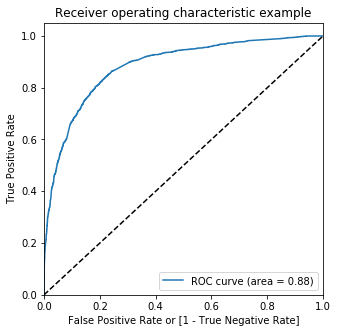

In [77]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding optimal cutoff point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [78]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.091842,3894,0,1,0,0,0,0,0,0,0,0,0
1,1,0.735382,1925,1,1,1,1,1,1,1,1,1,0,0
2,1,0.953396,6175,1,1,1,1,1,1,1,1,1,1,1
3,1,0.325356,9094,0,1,1,1,1,0,0,0,0,0,0
4,0,0.049901,450,0,1,0,0,0,0,0,0,0,0,0


In [79]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384810  1.000000  0.000000
0.1   0.1  0.597310  0.967928  0.365484
0.2   0.2  0.760918  0.905839  0.670267
0.3   0.3  0.803165  0.843339  0.778035
0.4   0.4  0.813133  0.778783  0.834619
0.5   0.5  0.812184  0.701891  0.881173
0.6   0.6  0.797627  0.589638  0.927726
0.7   0.7  0.782753  0.515625  0.949846
0.8   0.8  0.757911  0.420230  0.969136
0.9   0.9  0.716297  0.282072  0.987912


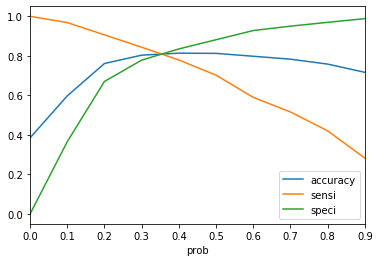

In [80]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [81]:
# Let us make the final prediction using 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.091842,3894,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.735382,1925,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.953396,6175,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.325356,9094,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.049901,450,0,1,0,0,0,0,0,0,0,0,0,0


In [82]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.091842,3894,0,1,0,0,0,0,0,0,0,0,0,0,9
1,1,0.735382,1925,1,1,1,1,1,1,1,1,1,0,0,1,74
2,1,0.953396,6175,1,1,1,1,1,1,1,1,1,1,1,1,95
3,1,0.325356,9094,0,1,1,1,1,0,0,0,0,0,0,0,33
4,0,0.049901,450,0,1,0,0,0,0,0,0,0,0,0,0,5
5,0,0.071016,3890,0,1,0,0,0,0,0,0,0,0,0,0,7
6,0,0.458754,5754,0,1,1,1,1,1,0,0,0,0,0,1,46
7,0,0.238549,6732,0,1,1,1,0,0,0,0,0,0,0,0,24
8,0,0.199147,2810,0,1,1,0,0,0,0,0,0,0,0,0,20
9,0,0.194734,986,0,1,1,0,0,0,0,0,0,0,0,0,19


In [83]:
#Lets check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8079113924050633

In [84]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3131,  757],
       [ 457, 1975]], dtype=int64)

In [85]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
#Sensitivity
TP / float(TP+FN)

0.8120888157894737

In [87]:
#Specificity
TN / float(TN+FP)

0.805298353909465

In [88]:
#False positive rate
FP / float(TN+FP)

0.19470164609053497

In [89]:
#Positive predictive value
TP / float(TP+FP)

0.722913616398243

In [90]:
#Negative predictive value
TN / float(TN+FN)

0.8726309921962095

### Precision and Recall

In [91]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3426,  462],
       [ 725, 1707]], dtype=int64)

### Precision

TP / TP + FP

In [92]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7869986168741355

### Recall

TP / TP + FN

In [93]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.701891447368421

### Precision and recall tradeoff

In [94]:
from sklearn.metrics import precision_recall_curve

In [95]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      1
 13      1
 14      1
 15      0
 16      1
 17      0
 18      0
 19      0
 20      1
 21      0
 22      1
 23      0
 24      0
 25      1
 26      0
 27      0
 28      1
 29      0
 30      0
 31      0
 32      0
 33      0
 34      0
 35      0
 36      1
 37      0
 38      1
 39      1
 40      1
 41      1
 42      1
 43      0
 44      1
 45      1
 46      1
 47      1
 48      1
 49      0
 50      1
 51      0
 52      0
 53      1
 54      0
 55      1
 56      1
 57      0
 58      0
 59      0
 60      0
 61      0
 62      0
 63      0
 64      0
 65      1
 66      1
 67      0
 68      0
 69      0
 70      0
 71      0
 72      0
 73      0
 74      0
 75      0
 76      1
 77      1
 78      0
 79      1
 80      0
 81      1
 82      0
 83      1
 84      0
 85      0
 86      1
 87      0
 88      0
 89      0
 90      1

In [96]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

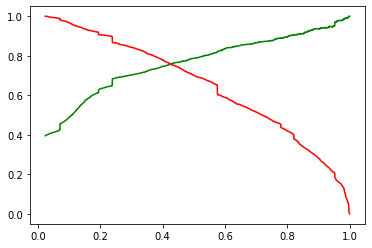

In [97]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predicition on the test set

In [98]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [99]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3580,0,0.0625,0.111407,0,0,0,1,0,0,0,0,0,1,0,0
379,0,0.0625,0.094984,0,0,0,1,0,0,0,0,0,1,0,0
3525,1,0.0625,0.486019,0,0,0,0,1,0,0,0,0,0,0,0
1432,0,0.6875,0.467821,0,0,0,0,0,0,0,0,1,0,0,0
4889,1,0.4375,0.094097,0,0,0,0,0,0,0,0,0,0,0,1


In [100]:
X_test_sm = sm.add_constant(X_test)

In [101]:
y_test_pred = logr7.predict(X_test_sm)

In [102]:
y_test_pred[:10]

3580    0.050575
379     0.047067
3525    0.264196
1432    0.581263
4889    0.030071
3701    0.107246
1217    0.126185
7648    0.218288
6721    0.094410
2227    0.299301
dtype: float64

In [103]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [104]:
# Let's see the head
y_pred_1.head()

,0
3580,0.050575
379,0.047067
3525,0.264196
1432,0.581263
4889,0.030071


In [105]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [106]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [107]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [108]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [109]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3580,0.050575
1,1,379,0.047067
2,0,3525,0.264196
3,1,1432,0.581263
4,0,4889,0.030071


In [110]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [111]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Converted_Prob
0,0,3580,0.050575
1,1,379,0.047067
2,0,3525,0.264196
3,1,1432,0.581263
4,0,4889,0.030071


In [112]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.35%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [113]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob,final_predicted
0,0,3580,0.050575,0
1,1,379,0.047067,0
2,0,3525,0.264196,0
3,1,1432,0.581263,1
4,0,4889,0.030071,0


In [114]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,Converted,LeadID,Converted_Prob,final_predicted,lead_score
0,0,3580,0.050575,0,5
1,1,379,0.047067,0,5
2,0,3525,0.264196,0,26
3,1,1432,0.581263,1,58
4,0,4889,0.030071,0,3
5,0,3701,0.107246,0,11
6,0,1217,0.126185,0,13
7,0,7648,0.218288,0,22
8,0,6721,0.094410,0,9
9,1,2227,0.299301,0,30


In [115]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    842
0    203
Name: final_predicted, dtype: int64

In [116]:
# check the precentage of final_predicted conversions on test data

842/float(842+203)

0.8057416267942584

Hence we can see that the final prediction of conversions have a target rate of 80%.

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set¶


In [120]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8076781100036914

In [121]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1346,  318],
       [ 203,  842]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
#sensitivity 
TP / float(TP+FN)

0.8057416267942584

In [124]:
#specificity
TN / float(TN+FP)

0.8088942307692307

#### Precision and Recall metrics for the test set

In [125]:
from sklearn.metrics import precision_score, recall_score

# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7258620689655172
recall  0.8057416267942584


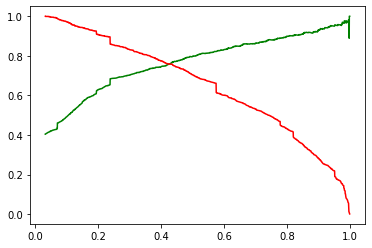

In [126]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 80%, 81% and 80% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.   